In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from clean_nums import * 
import numpy as np

data_file_path = "../data/final_0_80509.csv"

In [5]:
df = pd.read_csv(data_file_path,parse_dates=True, low_memory=False)

In [12]:
'''
    Index,AppID,Title,Initial_Price,Final_Price,Discount_Percent,Developers,Publishers,Genres,Categories,Required_Age,Achievements,Release_Date,Metacritic_score,DLC_Flag,Win_Flag,Mac_Flag,Linux_Flag,OS,Processor,Memory,Graphics,DirectX,Storage,Current_Players,Interface_Languages,Audio_Languages,Subtitle_Languages,Positive_Reviews,Negative_Reviews,Total_Reviews,Overall_Review_Summary,Recent_Reviews,Recent_Review_Summary,Mature_Content_Desc,Awards,Curators
'''

# Cleaning required cols
data = df[["AppID","Positive_Reviews","Negative_Reviews","Final_Price","Memory","Storage"]]
data.dropna(inplace = True)

# Further processing numeric cols
data["Positive_Reviews"] = data["Positive_Reviews"].apply(lambda x : int(extract_number(x)))
data["Negative_Reviews"] = data["Negative_Reviews"].apply(lambda x : int(extract_number(x)))
data.reset_index(inplace=True)

# Adding a column for negative percent
data["Negative_Review_Percent"] = (data["Negative_Reviews"] / (data["Positive_Reviews"] + data["Negative_Reviews"])) * 100

data

C:\Users\user\AppData\Local\Temp\ipykernel_2816\1381855101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_2816\1381855101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive_Reviews"] = data["Positive_Reviews"].apply(lambda x : int(extract_number(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_2816\1381855101.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,index,AppID,Positive_Reviews,Negative_Reviews,Final_Price,Memory,Storage,Negative_Review_Percent
0,1,655370,57,7,52.0,1 GB,50 MB,10.937500
1,4,1139950,53,6,0.0,2 GB,3 GB,10.169492
2,5,1469160,133,69,0.0,2 GB,100 MB,34.158416
3,6,1659180,22,9,530.0,2 GB,500 MB,29.032258
4,7,1968760,1,0,349.0,1 GB,300 MB,0.000000
...,...,...,...,...,...,...,...,...
57519,80505,574674,0,1,285.0,1 GB,2 GB,100.000000
57520,80506,947930,67,7,36.0,4 GB,20 GB,9.459459
57521,80507,1900780,10,0,360.0,6 GB,6 GB,0.000000
57522,80508,2470521,3,19,1199.0,4 GB,12 GB,86.363636


In [24]:
# Parsing storage and memory

def filter_fn(row):

    if len(row["Memory"].split()) == 2 and len(row["Storage"].split()) == 2:
        return True
    return False

# data["Storage_MB"] = data["Storage"].apply(extract_memory_or_storage)
m = data.apply(filter_fn, axis=1)
data = data[m]
data["Memory_MB"] =  data["Memory"].apply(extract_memory_or_storage)
data["Storage_MB"] =  data["Storage"].apply(extract_memory_or_storage)
data

C:\Users\user\AppData\Local\Temp\ipykernel_2816\3972231951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Memory_MB"] =  data["Memory"].apply(extract_memory_or_storage)
C:\Users\user\AppData\Local\Temp\ipykernel_2816\3972231951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Storage_MB"] =  data["Storage"].apply(extract_memory_or_storage)


,index,AppID,Positive_Reviews,Negative_Reviews,Final_Price,Memory,Storage,Negative_Review_Percent,Memory_MB,Storage_MB
0,1,655370,57,7,52.0,1 GB,50 MB,10.937500,1024,50
1,4,1139950,53,6,0.0,2 GB,3 GB,10.169492,2048,3072
2,5,1469160,133,69,0.0,2 GB,100 MB,34.158416,2048,100
3,6,1659180,22,9,530.0,2 GB,500 MB,29.032258,2048,500
4,7,1968760,1,0,349.0,1 GB,300 MB,0.000000,1024,300
...,...,...,...,...,...,...,...,...,...,...
57519,80505,574674,0,1,285.0,1 GB,2 GB,100.000000,1024,2048
57520,80506,947930,67,7,36.0,4 GB,20 GB,9.459459,4096,20480
57521,80507,1900780,10,0,360.0,6 GB,6 GB,0.000000,6144,6144
57522,80508,2470521,3,19,1199.0,4 GB,12 GB,86.363636,4096,12288


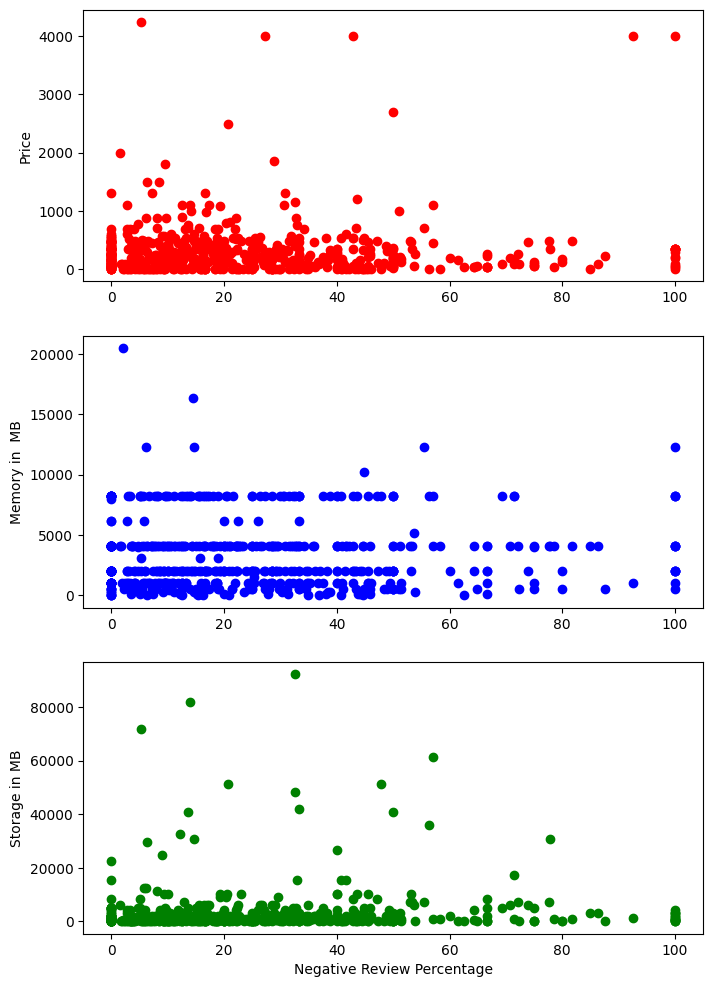

In [44]:
# Plotting the curves to see trend of negative review percent with price, memory, storage

some_rows = data[::100]

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(8,12))

ax1.scatter(some_rows["Negative_Review_Percent"],some_rows["Final_Price"],color="red")
ax1.set(ylabel="Price")


ax2.scatter(some_rows["Negative_Review_Percent"],some_rows["Memory_MB"],color="blue")
ax2.set(ylabel="Memory in  MB")

ax3.scatter(some_rows["Negative_Review_Percent"],some_rows["Storage_MB"],color="green")
ax3.set(ylabel="Storage in MB")
plt.xlabel("Negative Review Percentage")
plt.show()

# To illustrate the factors contributing to negative reviews of a game, such as whether memory or pricing are influencing its decline.

## Inferences
1. It doesn't seem that negative review percentage is related to any of storage or memory or pricing of a game.
2. This makes sense as some intrinsic factors might affect negative review percent and overall experience of players like
    - Story
    - Lore
    - Controls
    - Marketing
    All of which could not be predicted based on our data elements
